In [1]:
# Mean Shift Clustering
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Data/Mall_customers.csv')
data = dataset.iloc[:, [3, 4]].values
data.shape

(200, 2)

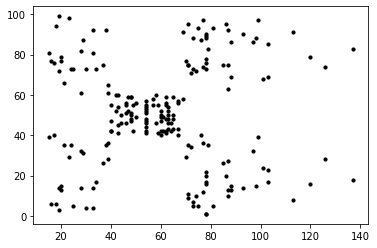

In [3]:
# visalizing the dataset
plt.scatter(data[:, 0], data[:, 1], s = 10, c = 'black')

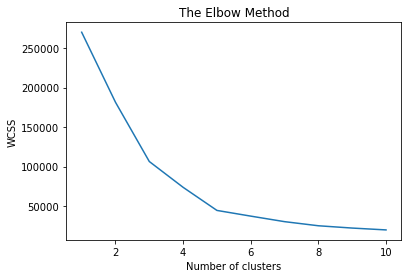

In [4]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [5]:
# Fitting Mean Shift to the dataset
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(data, quantile=0.15)
meanshift = MeanShift(bandwidth=bandwidth)
labels = meanshift.fit_predict(data)
print(bandwidth)
np.unique(labels)

22.29884826908017


array([0, 1, 2, 3, 4], dtype=int64)

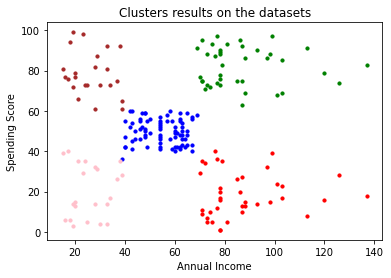

In [6]:
# Visualising the clusters
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], s = 10, c = 'red')
plt.scatter(data[labels == 2, 0], data[labels == 2, 1], s = 10, c = 'green')
plt.scatter(data[labels == 3, 0], data[labels == 3, 1], s = 10, c = 'brown')
plt.scatter(data[labels == 4, 0], data[labels == 4, 1], s = 10, c = 'pink')
plt.title('Clusters results on the datasets')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()